In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency


sns.set(style="whitegrid")
team_id = 6

# Importing dataset. Taking Sample (df)

In [2]:
# read data, extract sample
data = pd.read_csv("Student_Performance_Factors.csv")
df = data.sample(n=1000, random_state=team_id)

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
2150,19,64,Low,Medium,Yes,9,81,High,Yes,0,Medium,High,Public,Neutral,3,Yes,High School,Near,Male,62
3363,12,69,High,Low,No,7,70,Medium,Yes,1,Medium,Medium,Private,Positive,4,No,High School,Near,Male,62
5495,12,97,Low,Medium,Yes,6,79,Medium,No,1,Medium,Medium,Public,Negative,2,No,High School,Near,Male,65
3906,28,80,Medium,High,No,6,96,High,Yes,2,Low,Medium,Public,Positive,6,No,High School,Near,Male,73
2781,16,89,High,Medium,Yes,7,83,High,Yes,0,Low,High,Public,Positive,4,No,Postgraduate,Moderate,Male,70


# Data Description

| Attribute                      | Description                                                                   |
|:-------------------------------|:------------------------------------------------------------------------------|
| **Hours_Studied**              | Number of hours spent studying per week.                                      |
| **Attendance**                 | Percentage of classes attended.                                               |
| **Parental_Involvement**       | Level of parental involvement in the student's education (Low, Medium, High). |
| **Access_to_Resources**        | Availability of educational resources (Low, Medium, High).                    |
| **Extracurricular_Activities** | Participation in extracurricular activities (Yes, No).                        |
| **Sleep_Hours**                | Average number of hours of sleep per night.                                   |
| **Previous_Scores**            | Scores from previous exams.                                                   |
| **Motivation_Level**           | Student's level of motivation (Low, Medium, High).                            |
| **Internet_Access**            | Availability of internet access (Yes, No).                                    |
| **Tutoring_Sessions**          | Number of tutoring sessions attended per month.                               |
| **Family_Income**              | Family income level (Low, Medium, High).                                      |
| **Teacher_Quality**            | Quality of the teachers (Low, Medium, High).                                  |
| **School_Type**                | Type of school attended (Public, Private).                                    |
| **Peer_Influence**             | Influence of peers on academic performance (Positive, Neutral, Negative).     |
| **Physical_Activity**          | Average number of hours of physical activity per week.                        |
| **Learning_Disabilities**      | Presence of learning disabilities (Yes, No).                                  |
| **Parental_Education_Level**   | Highest education level of parents (High School, College, Postgraduate).      |
| **Distance_from_Home**         | Distance from home to school (Near, Moderate, Far).                           |
| **Gender**                     | Gender of the student (Male, Female).                                         |
| **Exam_Score**                 | Final exam score.                                                             |

# Data Cleaning

Removing duplicates

In [3]:
df = df.drop_duplicates()
df.shape

(1000, 20)

Check missing value

In [4]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               10
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      14
Distance_from_Home             8
Gender                         0
Exam_Score                     0
dtype: int64

There are $3$ categorical variables with missing values: `Teacher_Quality`, `Parental_Education_Level`, `Distance_from_Home`.

Keeping missing values will cause some bias in our analysis; therefore, we must handle them. One common way is to **Remove rows with null values**, but this way depends on the context and the importance of these rows. To see whether these rows are important, we can perform a statistical test to determine if the missing values are randomly distributed or if they have a pattern.

For the statistical test, we use **Chi-Square test** to determine if there is a significant association between two categorical variables. In this case, we are interested in understanding if the missingness of `Teacher_Quality` is associated with `Exam_Score`. In terms of statistics, we have 2 hypotheses:
\begin{cases}
H_0: \text{No Association} \\
H_1: \text{Association}
\end{cases}

Suppose our significant level is $0.05$, and we want to calculate whether $p > 0.05$, where $p$ is the p-value from the test. If so, keep $H_0$. Else, reject $H_0$.


For `Teacher_Quality`:

In [5]:
contingency_table = pd.crosstab(df['Teacher_Quality'].isnull(), df['Exam_Score'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"p-value: {p}")

p-value: 0.18622946332728363


$p > 0.05$, so we cannot reject the null hypothesis. Since there is no association between the missingness of `Teacher_Quality` and `Exam_Score`, we can safely remove rows without introducing bias.

In [6]:
# Remove null values in Teacher 
df = df.dropna(subset=['Teacher_Quality'])

For `Parental_Education_Level`:

In [7]:
contingency_table = pd.crosstab(df['Parental_Education_Level'].isnull(), df['Exam_Score'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"p-value: {p}")

p-value: 0.9422160179145131


$p > 0.05$, so we cannot reject the null hypothesis. Since there is no association between the missingness of `Parental_Education_Level` and `Exam_Score`, we can safely remove rows without introducing bias.

In [8]:
df = df.dropna(subset=['Parental_Education_Level'])

For `Distance_from_Home`:

In [9]:
contingency_table = pd.crosstab(df['Distance_from_Home'].isnull(), df['Exam_Score'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"p-value: {p}")

p-value: 0.677500284929728


$p > 0.05$, so we cannot reject the null hypothesis. Since there is no association between the missingness of `Distance_from_Home` and `Exam_Score`, we can safely remove rows without introducing bias.

In [10]:
df = df.dropna(subset=['Distance_from_Home'])

In [11]:
# Recheck
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, 2150 to 4450
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               969 non-null    int64 
 1   Attendance                  969 non-null    int64 
 2   Parental_Involvement        969 non-null    object
 3   Access_to_Resources         969 non-null    object
 4   Extracurricular_Activities  969 non-null    object
 5   Sleep_Hours                 969 non-null    int64 
 6   Previous_Scores             969 non-null    int64 
 7   Motivation_Level            969 non-null    object
 8   Internet_Access             969 non-null    object
 9   Tutoring_Sessions           969 non-null    int64 
 10  Family_Income               969 non-null    object
 11  Teacher_Quality             969 non-null    object
 12  School_Type                 969 non-null    object
 13  Peer_Influence              969 non-null    object


# Descriptive Statistics

## Graphical Method

### Univariate Data

#### Demographic Data

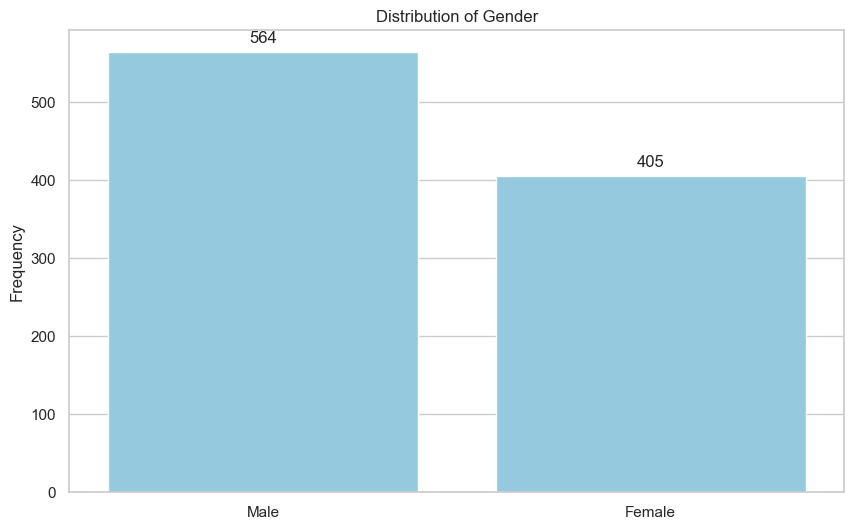

In [12]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = df['Gender'], color = 'skyblue')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title("Distribution of Gender")
plt.xlabel("")
plt.ylabel("Frequency")
plt.show()

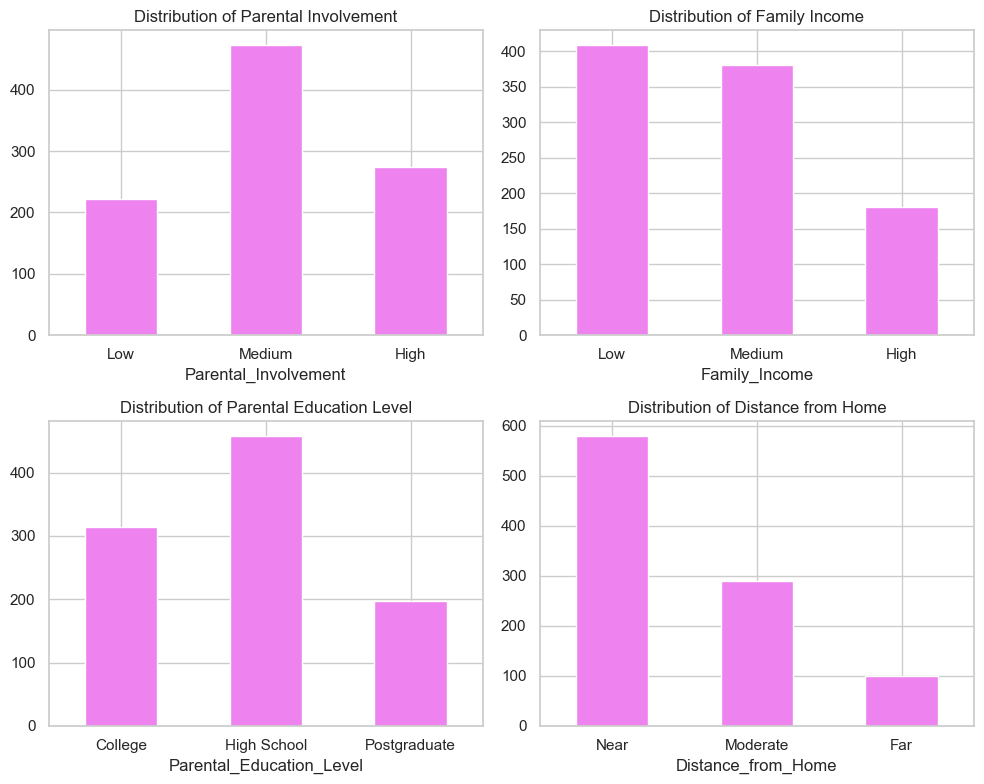

In [13]:
fig, axs = plt.subplots(2, 2, figsize = (10, 8))
columns = ['Parental_Involvement', 'Family_Income', 'Parental_Education_Level', 'Distance_from_Home']
for i, col in enumerate(columns):
    ax = axs[i//2, i % 2]
    if col in ['Parental_Involvement', 'Family_Income', 'Distance_from_Home']:
        sorted_values = df[col].value_counts().reindex(['Low', 'Medium', 'High', 'Near', 'Moderate', 'Far']).dropna()
    else:
        sorted_values = df[col].value_counts().sort_index()
    sorted_values.plot(kind='bar', ax=ax, color="violet")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(f"Distribution of {col.replace("_", " ")}")

plt.tight_layout()
plt.show()

#### Behavioral Data

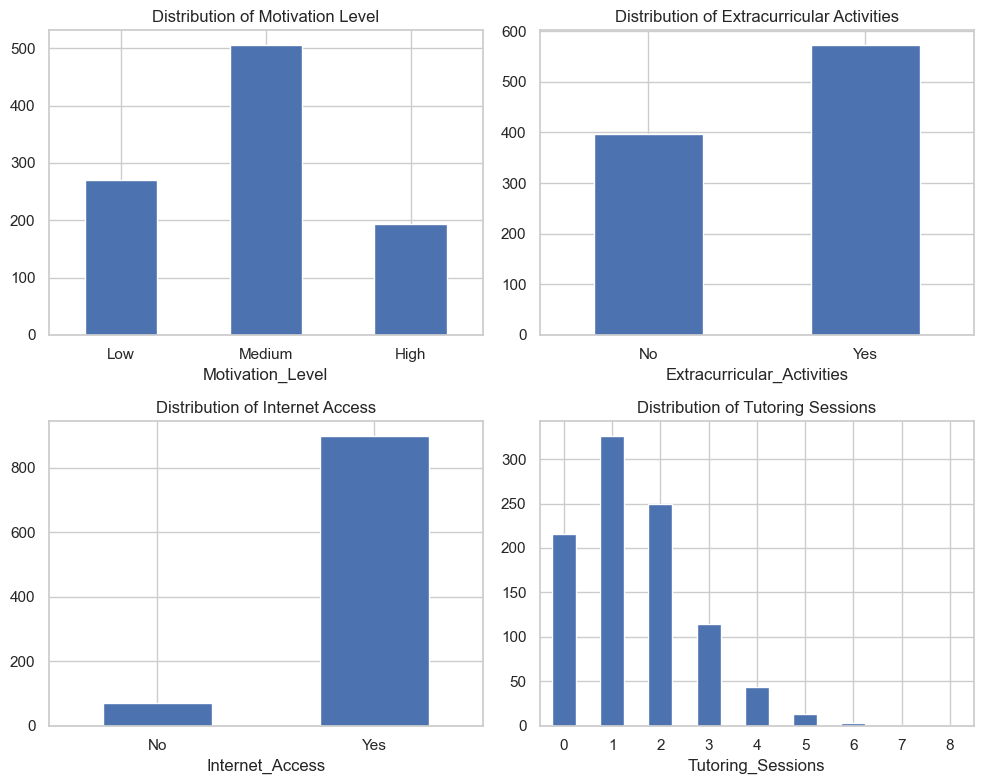

In [14]:
fig, axs = plt.subplots(2, 2, figsize = (10, 8))
columns = ['Motivation_Level', 'Extracurricular_Activities', 'Internet_Access', 'Tutoring_Sessions']
for i, col in enumerate(columns):
    ax = axs[i//2, i % 2]
    if col in ["Motivation_Level"]:
        sorted_values = df[col].value_counts().reindex(['Low', 'Medium', 'High']).dropna()
    else:
        sorted_values = df[col].value_counts().sort_index()
    sorted_values.plot(kind='bar', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(f"Distribution of {col.replace("_", " ")}")

plt.tight_layout()
plt.show()

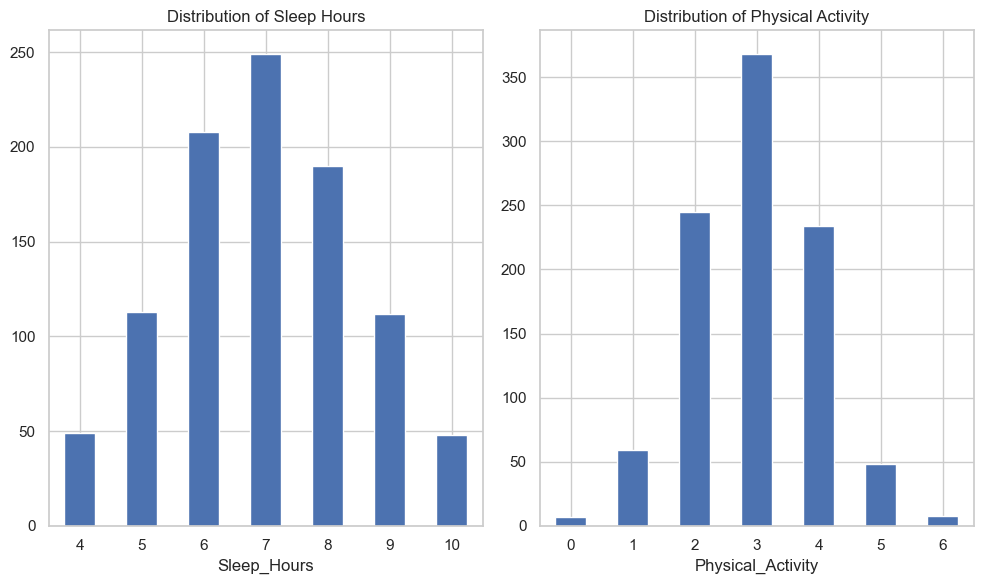

In [15]:
fig, axs = plt.subplots(1, 2, figsize = (10, 6))
columns = ['Sleep_Hours', 'Physical_Activity']
for i, col in enumerate(columns):
    ax = axs[i]
    sorted_values = df[col].value_counts().sort_index()
    sorted_values.plot(kind='bar', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(f"Distribution of {col.replace("_", " ")}")

plt.tight_layout()
plt.show()

#### Institutional Data 
Note: Public/Private School doesn't matter, so ignore `School_Type`

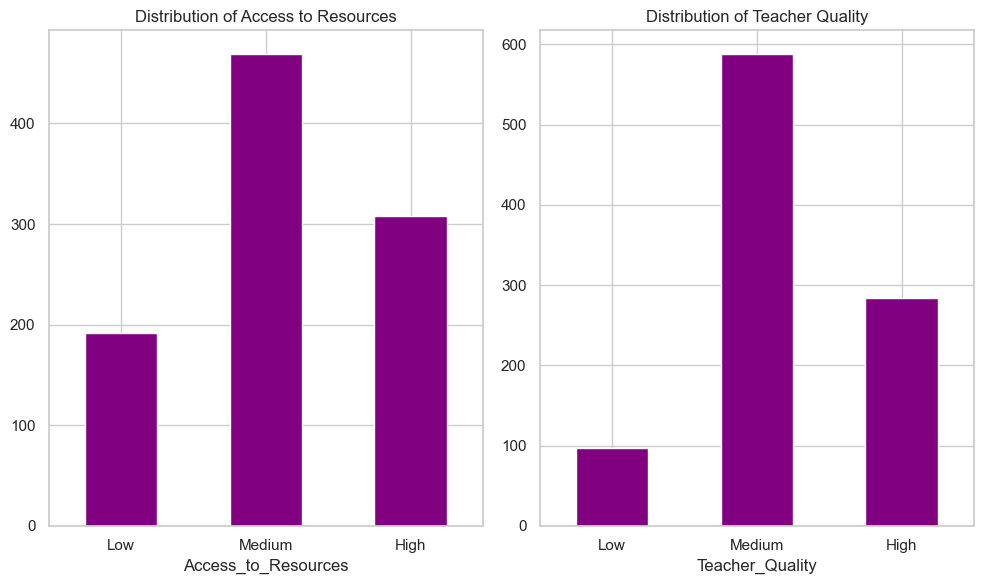

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
columns = ['Access_to_Resources', 'Teacher_Quality']
for i, col in enumerate(columns):
    ax = axs[i]
    if col in ['Access_to_Resources', 'Teacher_Quality']:
        sorted_values = df[col].value_counts().reindex(['Low', 'Medium', 'High']).dropna()
    else:
        sorted_values = df[col].value_counts().sort_index()
    sorted_values.plot(kind='bar', ax=ax, color = "purple")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(f"Distribution of {col.replace("_", " ")}")

plt.tight_layout()
plt.show()

#### Social and Environmental Data

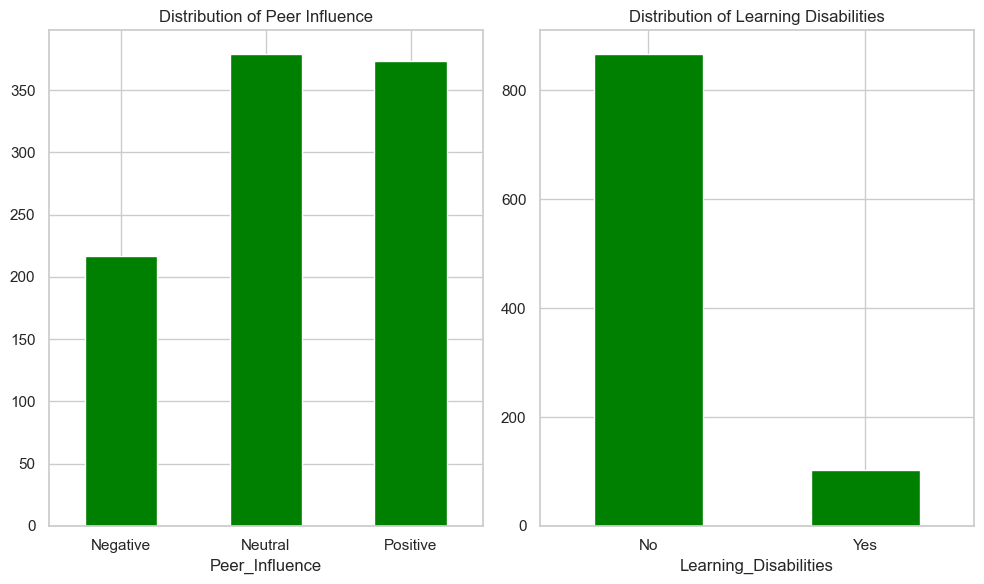

In [17]:
fig, axs = plt.subplots(1, 2, figsize = (10, 6))
columns = ['Peer_Influence', 'Learning_Disabilities']
for i, col in enumerate(columns):
    ax = axs[i]
    sorted_values = df[col].value_counts().sort_index()
    sorted_values.plot(kind='bar', ax=ax, color = "green")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=  0)
    ax.set_title(f"Distribution of {col.replace('_', ' ')}")

plt.tight_layout()
plt.show()

#### Academic Data

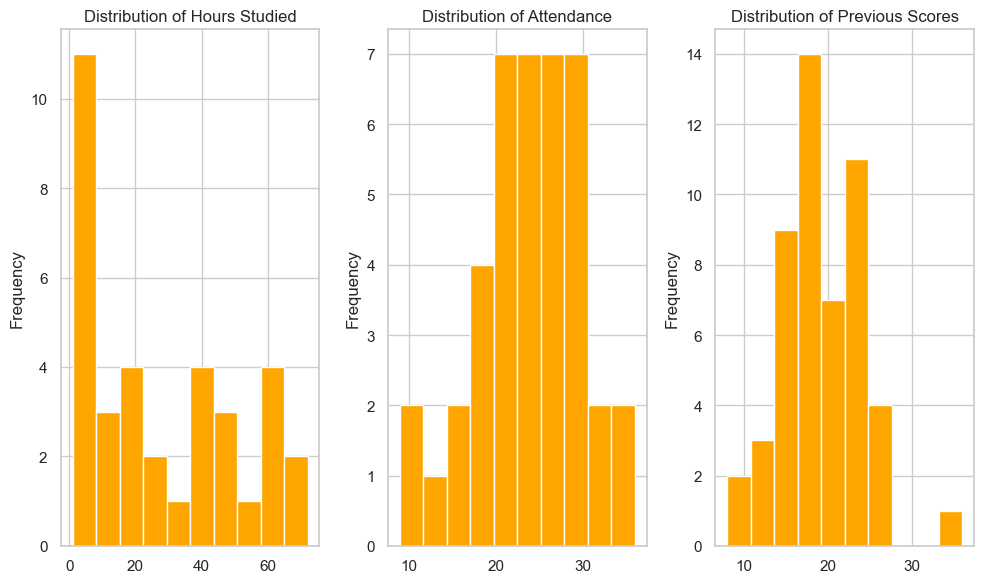

In [18]:
fig, axs = plt.subplots(1, 3, figsize = (10, 6))
columns = ['Hours_Studied', 'Attendance', 'Previous_Scores']
for i, col in enumerate(columns):
    ax = axs[i]
    sorted_values = df[col].value_counts().sort_index()
    sorted_values.plot(kind='hist', ax=ax, color = "orange")
    ax.set_title(f"Distribution of {col.replace('_', ' ')}")

plt.tight_layout()
plt.show()

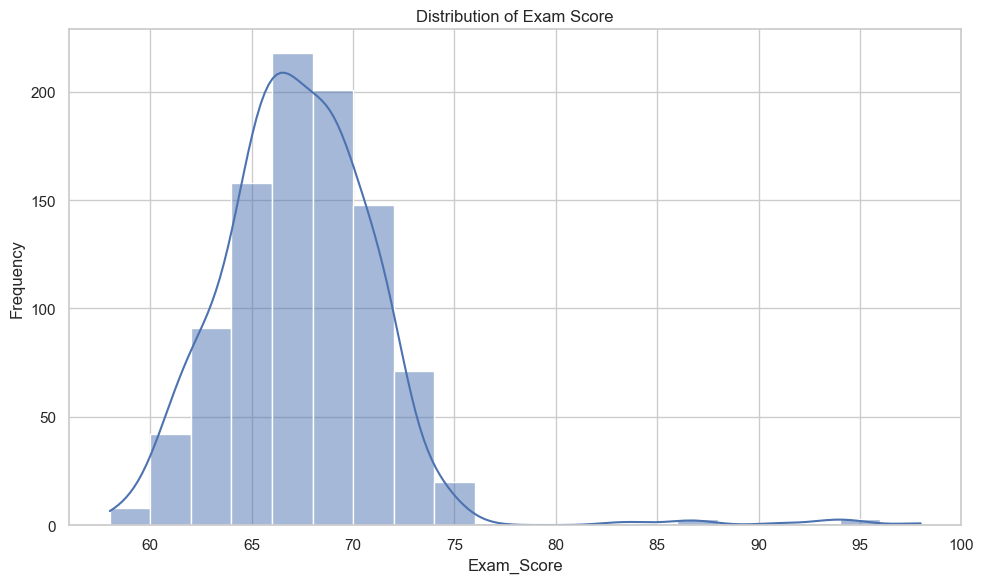

In [19]:
plt.figure(figsize = (10, 6))
col = "Exam_Score"
sns.histplot(data = df[col], kde = True, bins = 20)
plt.title(f"Distribution of {col.replace('_', ' ')}")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Bivariate Data

Relationship between **Hours Studied** and **Exam Score**

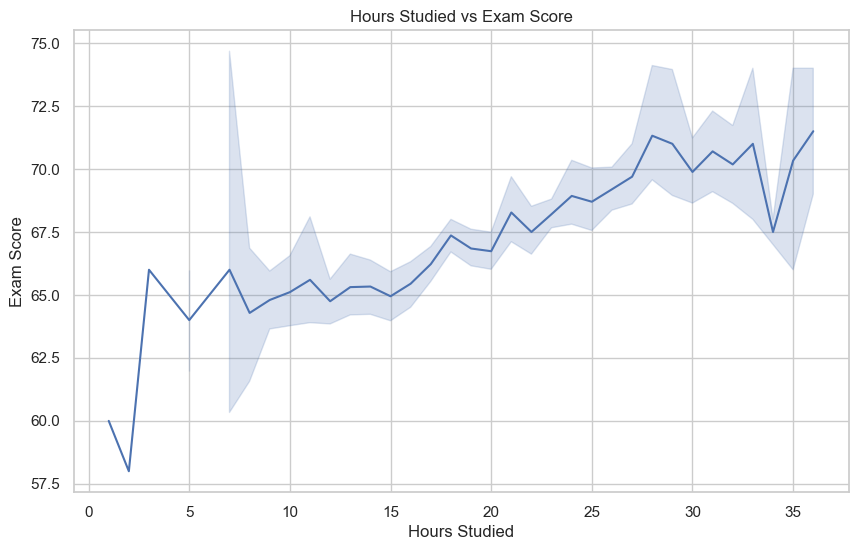

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()


1.	General Trend:
- There is a positive correlation between hours studied and exam scores.
- As study hours increase, exam scores generally rise from around 60 to 72+.
2.	Initial Variability (0–10 hours):
- In the first 10 hours, scores fluctuate significantly, with some students scoring as low as 58 and others achieving around 65–66.
- This indicates inconsistent performance with lower study hours.
3.	Steady Improvement (10–30 hours):
- Between 10 and 30 hours, exam scores show a consistent upward trend.
- Scores increase gradually, reaching about 70–72 at 30 hours studied.
4.	Confidence Band:
- The shaded band (confidence interval) narrows as study hours increase, indicating reduced variability in scores for students studying longer hours.
- This suggests that increased study hours lead to more reliable performance.
5.	Anomaly Near 35 Hours:
- There is a sharp drop in exam scores at 35 hours, but it rebounds quickly afterward.
- This may indicate fatigue, over-studying, or data irregularity for that specific point.
6. Implication
- Students should aim for 20–30 hours of study for optimal results, as this range shows the most reliable improvement in exam scores. Excessive study hours might lead to diminishing returns or fatigue.

Relationship between **Sleep Hours** and **Exam Score**

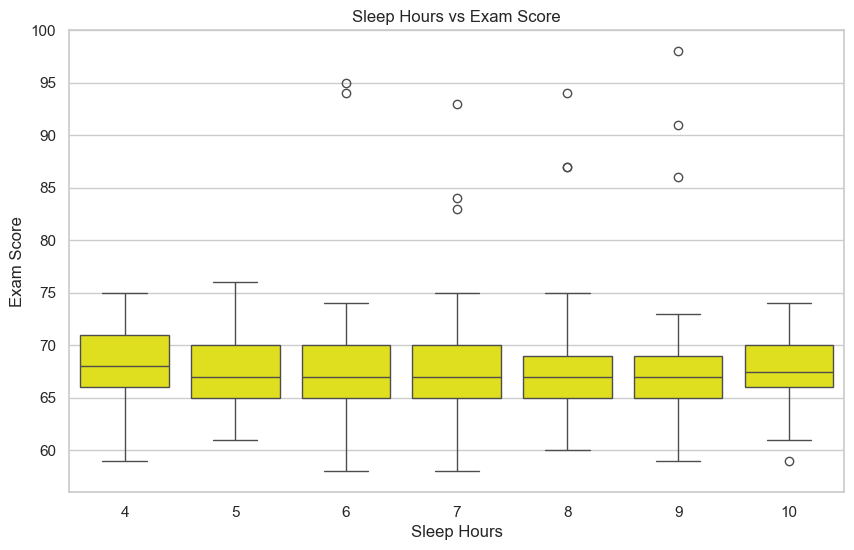

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep_Hours', y='Exam_Score', data=df, color = "yellow")
plt.title('Sleep Hours vs Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.show()


1.	General Trend:
- Exam scores are concentrated around the same median value across all sleep durations.
- This suggests no strong linear relationship between sleep hours and exam scores.
2.	Outliers:
- Outliers (exam scores significantly above the box plot range) are visible for 7-10 sleep hours, showing some students perform exceptionally well in this range.
- For lower sleep hours (4-6), fewer high scores are observed.
3.	Consistency:
- The interquartile range (IQR), which shows score variability, remains consistent across all sleep durations, suggesting that performance is relatively stable regardless of sleep hours.
4.	Median Scores:
- The median exam scores for different sleep hours are fairly similar, all clustering between 65 and 70.
5. Implication
- While adequate sleep (7-10 hours) is associated with higher outliers (exceptional scores), the overall exam scores do not vary significantly with sleep duration. Sleep hours may not strongly impact average performance, but better sleep may benefit exceptional performance.

Relationship between **Attendance** and **Exam Score**

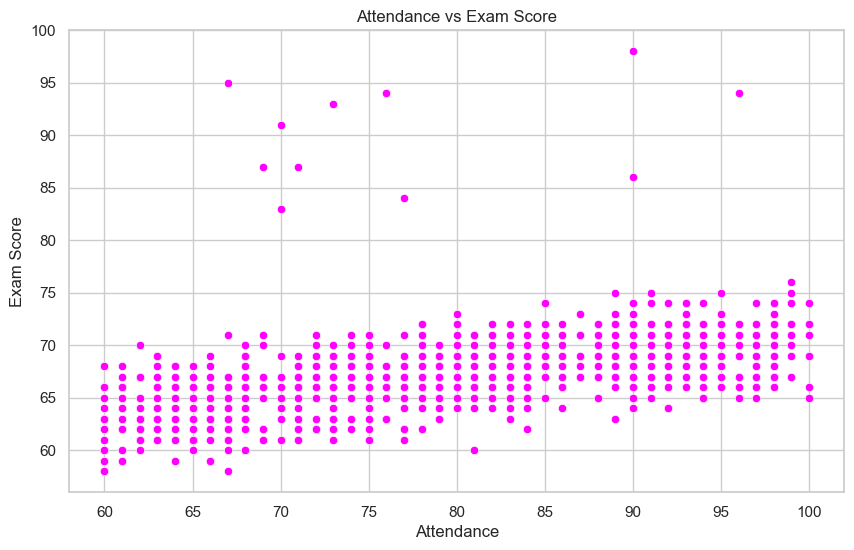

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attendance', y='Exam_Score', data=df, color = "magenta")
plt.title('Attendance vs Exam Score')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.show()


1.	Positive Correlation:
- Higher attendance correlates to higher exam score, as can be seen in the graph.
2.	Cluster of Scores:
- A dense concentration of exam score is seen between 60-75 across all attendance levels, indicating average performance.
- Exceptionally higher scores are mostly seen for students with attendance at least 70%.

3. Implication
- Improving attendance seems to positively influence exam performance, as students with higher attendance achieve better scores more consistently.

Relationship between **Tutoring Sessions** and **Exam Score**

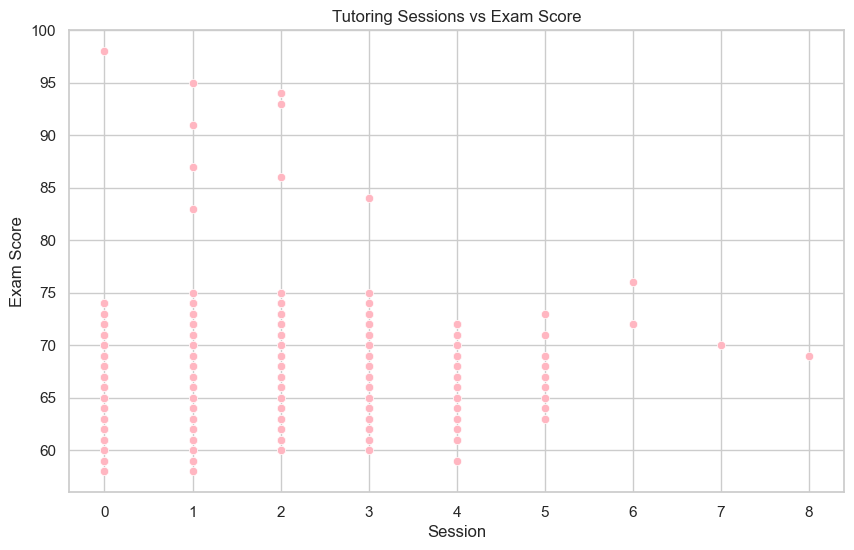

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tutoring_Sessions', y='Exam_Score', data=df, color = "lightpink")
plt.title('Tutoring Sessions vs Exam Score')
plt.xlabel('Session')
plt.ylabel('Exam Score')
plt.show()


1. No Strong Trend:
- There does not appear to be a clear upward or downward trend in exam scores based on the number of tutoring sessions.
- Students across all sessions (0–8) achieve scores distributed around 60–75, indicating inconsistent correlation.

2. High Scores:
- Exceptional exam scores (above 85–95) are observed primarily at 0 to 3 sessions.
- This suggests that some students perform exceptionally well even with minimal tutoring sessions.

3. Score Distribution:
- The majority of exam scores fall within the 60–75 range, regardless of tutoring frequency.
- For higher sessions (4–8), the concentration of scores appears to shrink slightly, with fewer high achievers.

4. Limited Data for High Sessions:
- There are fewer data points for students attending 6 or more sessions, which makes it difficult to draw strong conclusions about their performance.

5. Implication:
- The number of tutoring sessions does not clearly correlate with exam scores. Exceptional performance can occur with minimal tutoring, while consistent average scores dominate across all session counts. More data for higher session counts may clarify this pattern.

Relationship between **Physical Activity** and **Current Score**

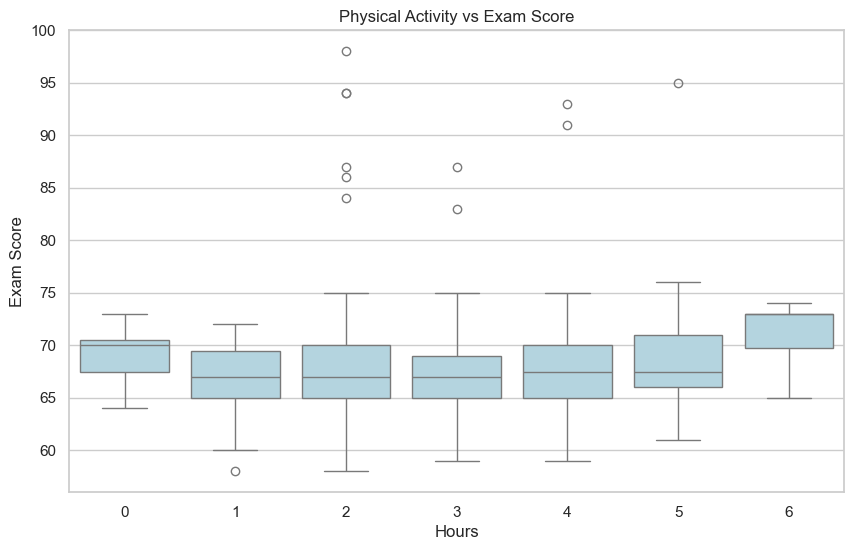

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Physical_Activity', y='Exam_Score', data=df, color = "lightblue")
plt.title('Physical Activity vs Exam Score')
plt.xlabel('Hours')
plt.ylabel('Exam Score')
plt.show()


1. Median Exam Scores:
- The median exam scores are fairly consistent across all physical activity levels but show a slight upward trend for higher activity hours (5–6 hours).

2. Outliers:
- High outliers (scores above 85–95) are present for 2 to 6 hours of physical activity, suggesting that moderate to higher activity levels are associated with exceptional performance.
- Students with 0 or 1 hour of activity have fewer exceptional scores.

3. Score Distribution:
- 0–3 hours of physical activity show similar interquartile ranges (IQR), meaning most scores are concentrated between 65–72.
- For 4–6 hours, the IQR shifts slightly upward, indicating improved performance for some students.

4. Performance Stability:
- The range of scores becomes slightly narrower at 6 hours, with fewer low scores (around 60) and a higher overall median.

5. Implication:
- While physical activity does not drastically influence average exam scores, higher physical activity levels (4–6 hours) are associated with improved median scores and more high-performing outliers. Moderate activity may benefit overall performance.

Relationship between **Parental Education Level** and **Parental Involvement**

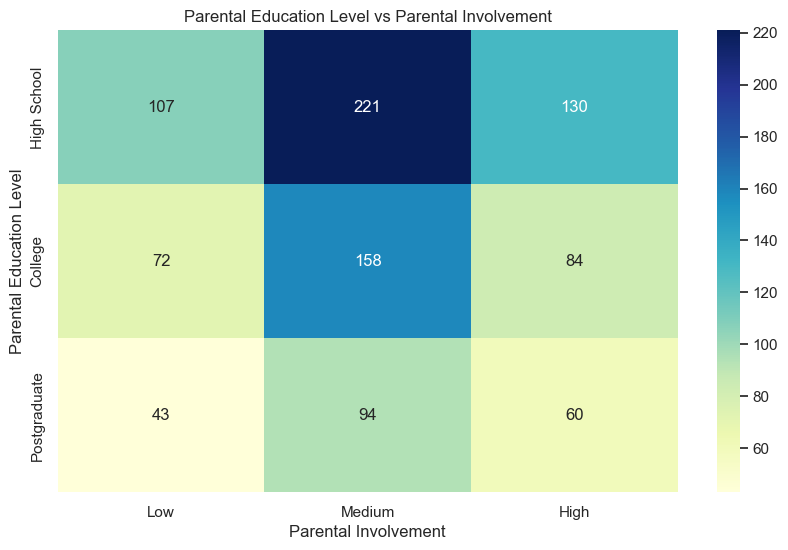

In [25]:
plt.figure(figsize=(10, 6))
heatmap_data = pd.crosstab(df['Parental_Education_Level'], df['Parental_Involvement']).reindex(index=['High School', 'College', 'Postgraduate'], columns=['Low', 'Medium', 'High'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Parental Education Level vs Parental Involvement')
plt.xlabel('Parental Involvement')
plt.ylabel('Parental Education Level')
plt.show()


1. Key Observations:
- High School Parents:
- Medium Involvement has the highest count (220+).
- High Involvement follows with 130, while Low Involvement has around 110.
- Suggests that most high school-educated parents exhibit medium to high involvement.
- College Parents:
- Medium Involvement is dominant (160+).
- High Involvement is 84, while Low Involvement is 72.
- Indicates a trend toward medium parental involvement.
- Postgraduate Parents:
- Parental involvement declines overall as education increases.
- Medium Involvement leads with 94, followed by High Involvement (60) and Low Involvement (43).

2. General Trend:
- Parents with higher education levels (Postgraduate) show lower counts of high involvement compared to parents with lower education levels (High School).
- Medium involvement is the most common category across all education levels.

3. Implication:
- Parents with a high school education are more likely to show medium or high involvement.
- Involvement decreases slightly for parents with college and postgraduate education, possibly due to time constraints or other commitments.
- Educational initiatives could target involvement among highly educated parents to encourage greater participation.

Relationship between **Internet Access** and **Access to Resources**

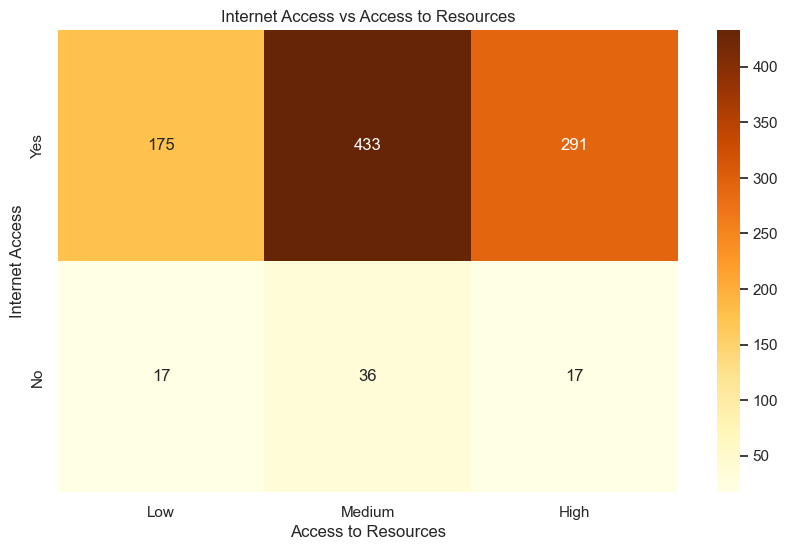

In [26]:
plt.figure(figsize=(10, 6))
heatmap_data = pd.crosstab(df['Internet_Access'], df['Access_to_Resources']).reindex(index = ['Yes', 'No'], columns = ['Low', 'Medium', 'High'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap="YlOrBr")
plt.title('Internet Access vs Access to Resources')
plt.xlabel('Access to Resources')
plt.ylabel('Internet Access')
plt.show()


1. General Trend:
- Internet Access significantly impacts access to resources:
- Individuals with internet access are more likely to have medium to high resources.
- Individuals without internet access have minimal access to resources, highlighting a digital divide.

2. Implication:
- Improving internet access can potentially bridge the gap in resource availability, as there is a strong association between internet access and better access to resources.

Relationship between **Peer Influence** and **Motivation Level**

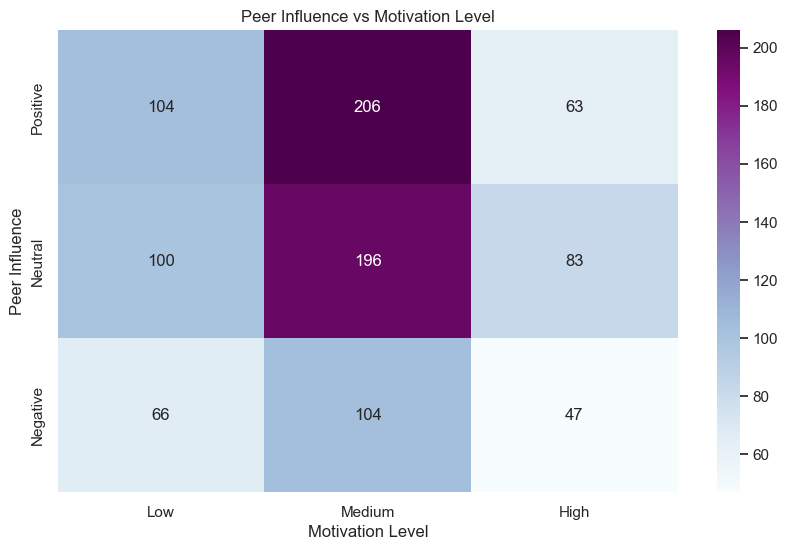

In [27]:
plt.figure(figsize=(10, 6))
heatmap_data = pd.crosstab(df['Peer_Influence'], df['Motivation_Level']).reindex(index=['Positive', 'Neutral', 'Negative'], columns=['Low', 'Medium', 'High'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap="BuPu")
plt.title('Peer Influence vs Motivation Level')
plt.xlabel('Motivation Level')
plt.ylabel('Peer Influence')
plt.show()


1. General Trends:
- Medium Motivation is the most common across all peer pressure types.
- Positive Peer Pressure has the largest impact, as it shows the highest counts for motivation.
- Negative Peer Pressure significantly reduces motivation levels, with minimal individuals reaching high motivation.

2. Implication:

- Encouraging positive peer environments can help enhance motivation levels, especially shifting individuals toward medium and high motivation. Negative peer pressure should be mitigated to avoid dampening motivation.

Relationship betwen **Teacher Quality** and **Motivation Level**

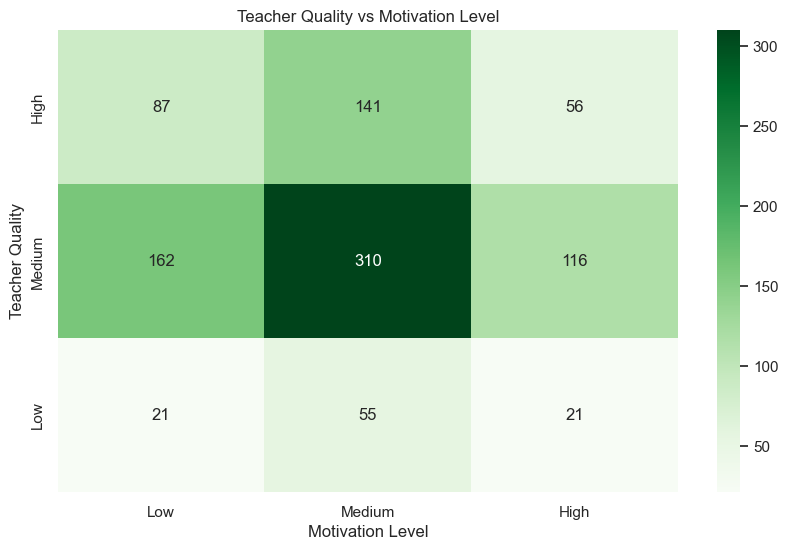

In [28]:
plt.figure(figsize=(10, 6))
heatmap_data = pd.crosstab(df['Teacher_Quality'], df['Motivation_Level']).reindex(index=['High', 'Medium', 'Low'], columns=['Low', 'Medium', 'High'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap="Greens")
plt.title('Teacher Quality vs Motivation Level')
plt.xlabel('Motivation Level')
plt.ylabel('Teacher Quality')
plt.show()


1. General Trends:
- Medium Motivation dominates across all teacher quality levels.
- High Teacher Quality does not guarantee higher motivation, as counts for high motivation are still relatively low.
- Low Teacher Quality results in minimal motivation at all levels.

2. Implication:
- Improving teacher quality can positively influence motivation, but other factors likely play a role in achieving high motivation levels. Focus should be on enhancing both teacher quality and additional support systems to encourage higher student motivation.

Relationship between **Motivation Level** and **Exam Score**

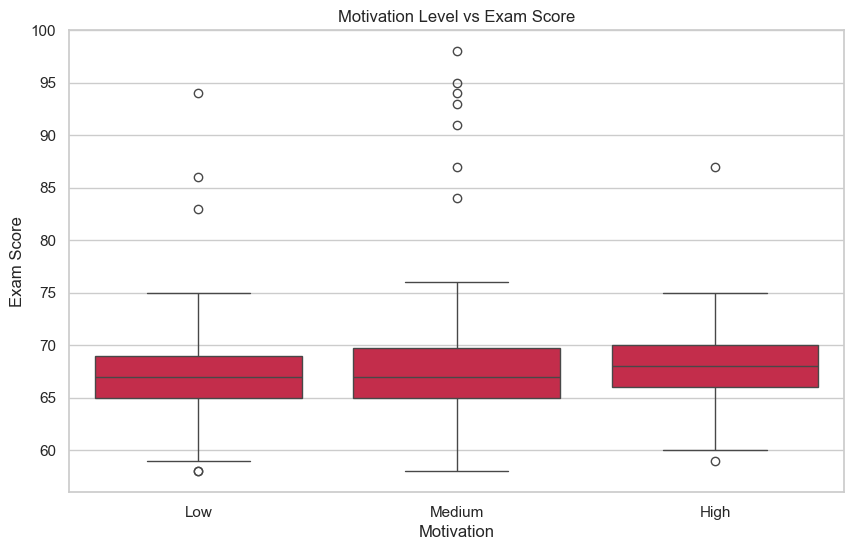

In [29]:
plt.figure(figsize=(10, 6))
df['Motivation_Level'] = pd.Categorical(df['Motivation_Level'], categories=['Low', 'Medium', 'High'], ordered=True)
sns.boxplot(x='Motivation_Level', y='Exam_Score', data=df, color="crimson")
plt.title('Motivation Level vs Exam Score')
plt.xlabel('Motivation')
plt.ylabel('Exam Score')
plt.show()


1. General Trend:
- While High Motivation students exhibit slightly more consistent performance, the median scores across all groups remain similar.
- Medium Motivation still produces high-performing outliers, suggesting that motivation alone is not the sole factor driving exceptional exam performance.
2. Outliers:
- High-performing outliers (above 85) are present in all motivation levels, particularly in the High and Medium Motivation groups.
- Fewer exceptional scores are visible in the Low Motivation group.
3. Consistency:
- High Motivation shows the most consistent performance (narrow IQR).
- Low Motivation has a slightly broader range, indicating more variability in performance.
4. Implication
- Motivation level influences consistency and the likelihood of exceptional performance. Supporting students with high motivation can maximize their potential, while identifying and assisting low-motivation groups may help reduce score variability and improve overall performance.

Relationship between **Parental_Involvement** and **Exam Score**

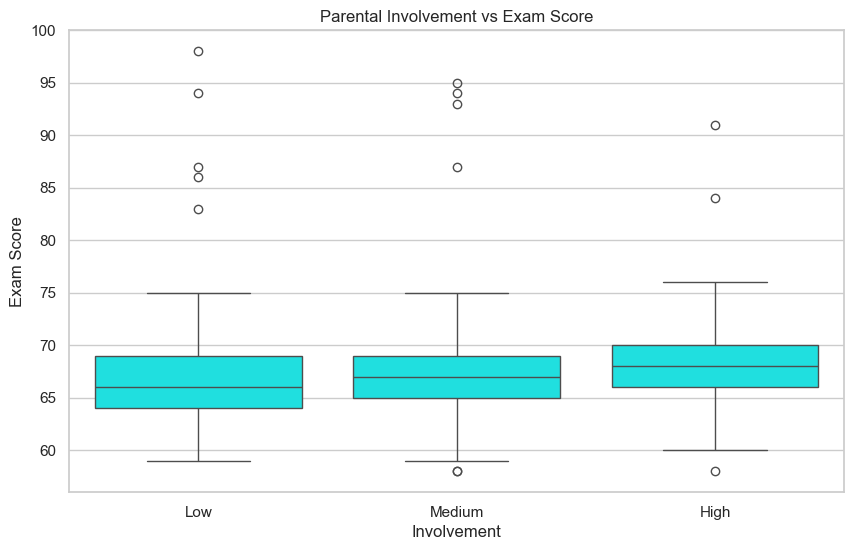

In [30]:
plt.figure(figsize=(10, 6))
df['Parental_Involvement'] = pd.Categorical(df['Parental_Involvement'], categories=['Low', 'Medium', 'High'], ordered=True)
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=df, color="aqua")
plt.title('Parental Involvement vs Exam Score')
plt.xlabel('Involvement')
plt.ylabel('Exam Score')
plt.show()


1.	Exam Score Distribution:
- The median exam scores are quite similar across all three levels of parental involvement.
- Median values (central line of the boxes) seem to hover around 65-68.
2.	Outliers:
- Outliers are observed across all categories, with some students achieving very high scores (above 90).
- High involvement shows fewer high outliers compared to Low and Medium.
3.	Spread (Variability):
- The interquartile range (IQR), represented by the box, appears similar across all categories.
- Whiskers extend slightly further for “Medium” and “High” involvement, suggesting greater variability.
4.	Conclusion:
- Parental involvement (Low, Medium, High) does not strongly influence the overall median exam score.
- However, all groups contain students with exceptional performance, possibly indicating that other factors influence high achievement.

Relationship betweeen **Access to Resources** and **Exam Score**

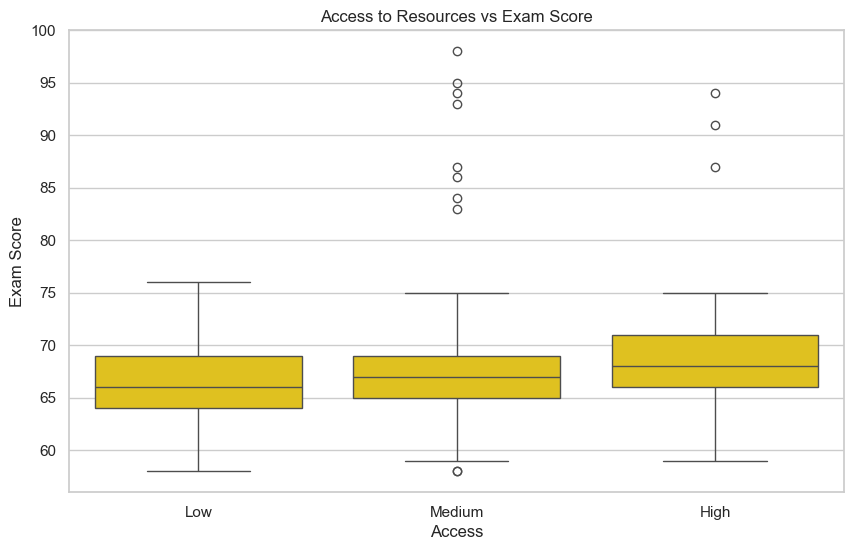

In [31]:
plt.figure(figsize=(10, 6))
df['Access_to_Resources'] = pd.Categorical(df['Access_to_Resources'], categories=['Low', 'Medium', 'High'], ordered=True)
sns.boxplot(x='Access_to_Resources', y='Exam_Score', data=df, color="gold")
plt.title('Access to Resources vs Exam Score')
plt.xlabel('Access')
plt.ylabel('Exam Score')
plt.show()


1.	Median Scores:
- The medians for all three categories (Low, Medium, and High) are similar, hovering between 66-70.
- However, the High Access group shows a slightly higher median compared to the other two.
2.	Spread (Variability):
- The interquartile range (IQR) for “High Access” is slightly wider than for “Low” and “Medium” Access groups, indicating more variability in scores.
- The whiskers for all groups are relatively similar in range.
3.	Outliers:
- All groups have outliers, particularly students scoring above 85.
- “Medium Access” shows a higher concentration of extreme outliers (above 90).
4.	Conclusion:
- Access to resources does not drastically influence the median exam score, but students with higher access tend to have slightly higher scores and more variability.
- Exceptional performances (outliers) are seen across all groups, suggesting other factors might play a role in individual success.

Relationship between **Learning Disabilities** and **Exam Score**

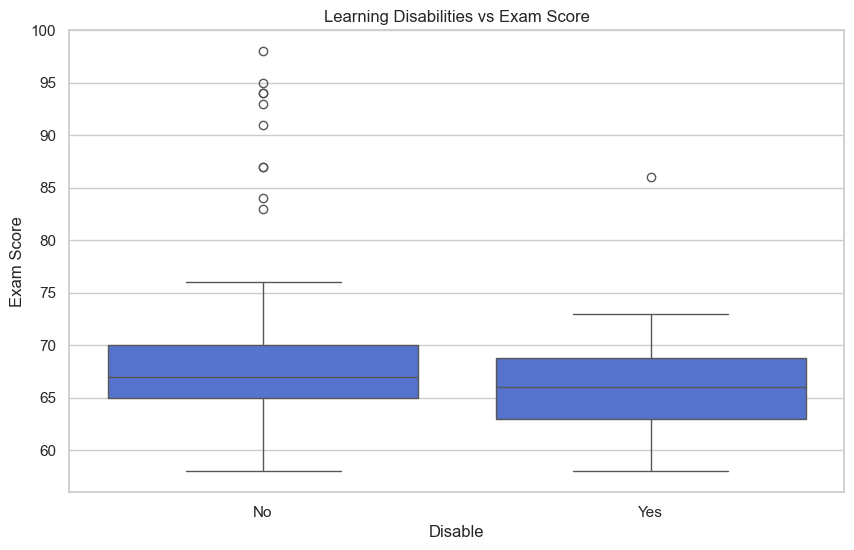

In [32]:
plt.figure(figsize=(10, 6))
df['Learning_Disabilities'] = pd.Categorical(df['Learning_Disabilities'], categories=['No', 'Yes'], ordered=True)
sns.boxplot(x='Learning_Disabilities', y='Exam_Score', data=df, color="royalblue")
plt.title('Learning Disabilities vs Exam Score')
plt.xlabel('Disable')
plt.ylabel('Exam Score')
plt.show()


1.	Median Scores:
- The median exam score for students without learning disabilities is slightly higher than those with learning disabilities.
- Both medians fall around the 65-70 range, but the “No” group has a slight advantage.
2.	Spread (Variability):
- The interquartile range (IQR) for both groups is quite similar, showing comparable score distributions.
- The whiskers (range) are slightly shorter for the “Yes” group, suggesting less variability in their scores.
3.	Outliers:
- Students without learning disabilities have more outliers, particularly those scoring above 85 and even reaching 100.
- For students with learning disabilities, fewer high-scoring outliers are observed.
4.	Conclusion:
- Students with learning disabilities tend to have slightly lower median scores and fewer high achievers compared to those without learning disabilities.
- The overall distribution of scores, however, remains quite similar for both groups.

Relationship between **Family Income** and **Exam Score**

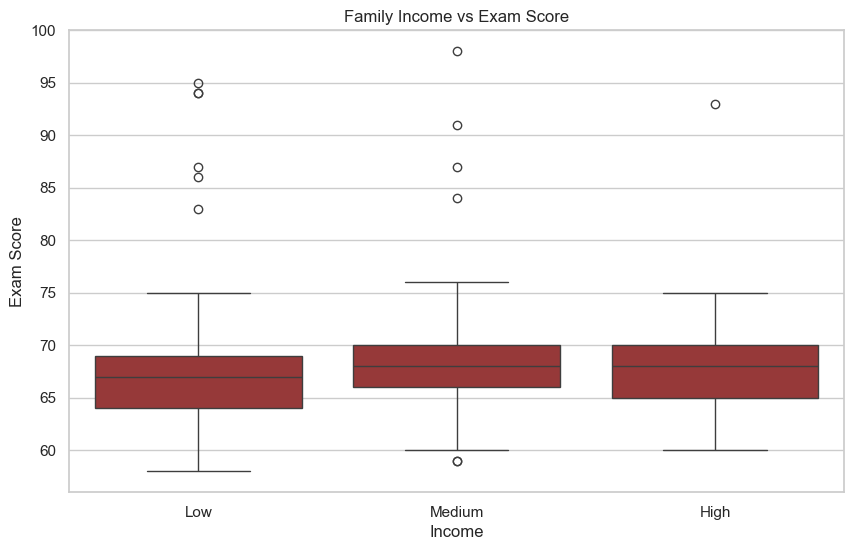

In [33]:
plt.figure(figsize=(10, 6))
df['Family_Income'] = pd.Categorical(df['Family_Income'], categories=['Low', 'Medium', 'High'], ordered=True)
sns.boxplot(x='Family_Income', y='Exam_Score', data=df, color="brown")
plt.title('Family Income vs Exam Score')
plt.xlabel('Income')
plt.ylabel('Exam Score')
plt.show()


1.	Median Exam Scores:
- The median scores for all three income groups (Low, Medium, and High) are quite similar, around 67–70. This indicates that the central performance does not vary significantly across income levels.
2.	Interquartile Range (IQR):
- The IQR (middle 50% of scores) is slightly higher for the Medium and High income groups compared to the Low income group.
- This suggests that scores in higher income groups are more spread out, showing greater variability.
3.	Outliers:
- Outliers (students with exceptionally high scores, above 80) appear in all three income groups.
- However, there are slightly more outliers in the Medium and High income groups, with a few reaching the 95–100 range.

Key Insight:

While family income does not strongly influence the median exam scores, students from Medium and High income groups show more variability in scores, including a higher presence of exceptional performers.

## Numerical Method

For **Hour Studied**

In [34]:
df['Hours_Studied'].describe()

count    969.000000
mean      20.067079
std        5.843397
min        1.000000
25%       16.000000
50%       20.000000
75%       24.000000
max       36.000000
Name: Hours_Studied, dtype: float64

- mean (20.07): On average, students studied 20.07 hours.
- std (5.84): The standard deviation is 5.84, indicating moderate spread of study hours around the mean.
- min (1.0): The minimum study time recorded is 1 hour.
- 25% (16.0): The lower quartile is 16 hours, meaning 25% of the students studied 16 hours or less.
- 50% (20.0): The median is 20 hours, showing that 50% of the students studied 20 hours or less.
- 75% (24.0): The upper quartile is 24 hours, meaning 75% of the students studied 24 hours or less.
- max (36.0): The maximum study time recorded is 36 hours.

Key observations:
- The majority of study hours are tightly clustered around the mean (20.07 hours).
- There are no extreme outliers, as the maximum (36 hours) is only moderately above the upper quartile (24 hours).
- The distribution appears to be fairly balanced since the median (20) is very close to the mean (20.07).

For **Attendance**

In [35]:
df['Attendance'].describe()

count    969.000000
mean      80.252838
std       11.755650
min       60.000000
25%       70.000000
50%       80.000000
75%       91.000000
max      100.000000
Name: Attendance, dtype: float64

- mean (80.25): The average attendance is 80.25%.
- std (11.76): The standard deviation is 11.76, showing a moderate spread around the mean.
- min (60.0): The lowest attendance recorded is 60%.
- 25% (70.0): The lower quartile is 70%, meaning 25% of students have attendance below 70%.
- 50% (80.0): The median is 80%, which aligns closely with the mean, indicating a fairly symmetric distribution.
- 75% (91.0): The upper quartile is 91%, meaning 75% of students have attendance below 91%.
- max (100.0): The highest attendance is 100%.

Key Observations:
- Attendance is generally high: The majority of students (50th percentile and above) have attendance close to or above 80%.
- Consistent spread: The difference between the lower quartile (70%) and upper quartile (91%) is modest, indicating the data is relatively concentrated.
- No extreme outliers: The minimum (60%) and maximum (100%) are within a reasonable range.

For **Sleep Hours**

In [36]:
df['Sleep_Hours'].describe()

count    969.000000
mean       6.976264
std        1.497399
min        4.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       10.000000
Name: Sleep_Hours, dtype: float64

- mean (6.98): The average sleep duration is approximately 7 hours.
- std (1.50): The standard deviation is 1.50, showing some variability in sleep hours.
- min (4.0): The shortest sleep duration is 4 hours.
- 25% (6.0): The lower quartile is 6 hours, meaning 25% of individuals sleep 6 hours or less.
- 50% (7.0): The median is 7 hours, which aligns closely with the mean, suggesting a symmetric distribution.
- 75% (8.0): The upper quartile is 8 hours, meaning 75% of individuals sleep 8 hours or less.
- max (10.0): The maximum sleep duration recorded is 10 hours.

Key Observations:
- Typical sleep duration: Most individuals sleep between 6 and 8 hours, which aligns with recommended sleep patterns.
- Symmetric distribution: The mean (6.98) and median (7.0) are almost identical, suggesting a balanced distribution.
- Moderate spread: With a standard deviation of 1.5, sleep hours vary moderately across individuals.

For **Previous Scores**

In [37]:
df['Previous_Scores'].describe()

count    969.000000
mean      75.076367
std       14.374577
min       50.000000
25%       63.000000
50%       75.000000
75%       88.000000
max      100.000000
Name: Previous_Scores, dtype: float64

For **Exam Score**

In [38]:
df['Exam_Score'].describe()

count    969.000000
mean      67.396285
std        4.127341
min       58.000000
25%       65.000000
50%       67.000000
75%       70.000000
max       98.000000
Name: Exam_Score, dtype: float64

Comparison with Exam Score:
1.	Mean Comparison:
- Previous Scores has a higher average (75.08) compared to Exam Score (67.40, from earlier).
- This indicates a drop in scores for the recent exam.
2.	Spread:
- Previous Scores has a larger standard deviation (14.37) compared to Exam Score (4.13), meaning the previous scores were more spread out, while the exam scores are tightly clustered.
3.	Range:
- Both datasets have the same max value of 100, but the min for Previous Scores is higher (50 vs. 58 for Exam Score).
4.	Quartiles:
- Previous Scores are generally higher across all quartiles compared to Exam Score:
- 25%: 63 (Previous) vs. 65 (Exam).
- 50% (Median): 75 (Previous) vs. 67 (Exam).
- 75%: 88 (Previous) vs. 70 (Exam).

Conclusion:

The Exam Score data shows a decrease in performance compared to Previous Scores, with lower averages, medians, and upper quartiles, and a much smaller spread of scores. This suggests overall poorer performance or more consistency in exam outcomes compared to previous assessments.

# Correlation Analysis

One-Hot Encoding is a crucial preprocessing step for categorical data. Many machine learning models require inputs to be numerical. While some can handle categorical data, most cannot, hence the need for a method to represent these categories numerically.

OneHotEncoder transforms categorical data into a format that works better with classification and regression algorithms.

For each category in a feature, the one-hot encoder creates a new binary feature. Each of these features indicates the presence (1) or absence (0) of the category in the original feature.

This way, categorical data can be efficiently used by machine learning algorithms. But be aware, one-hot encoding can significantly increase the data's dimensionality, a problem known as the "curse of dimensionality".

- Identify Categorical Variables: It takes a column with categorical data (e.g., 'red', 'blue', 'green') and converts it into multiple columns with binary values (0 or 1).

- Create Dummy Variables: For each unique category in the original column, it creates a new column. Each new column corresponds to one of the categories and contains 1 if the original value matches the category, otherwise 0.

- Integration with DataFrame: It can be applied to a single column or an entire DataFrame. When applied to a DataFrame, it will convert all the categorical columns.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, 2150 to 4450
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               969 non-null    int64   
 1   Attendance                  969 non-null    int64   
 2   Parental_Involvement        969 non-null    category
 3   Access_to_Resources         969 non-null    category
 4   Extracurricular_Activities  969 non-null    object  
 5   Sleep_Hours                 969 non-null    int64   
 6   Previous_Scores             969 non-null    int64   
 7   Motivation_Level            969 non-null    category
 8   Internet_Access             969 non-null    object  
 9   Tutoring_Sessions           969 non-null    int64   
 10  Family_Income               969 non-null    category
 11  Teacher_Quality             969 non-null    object  
 12  School_Type                 969 non-null    object  
 13  Peer_Influence       

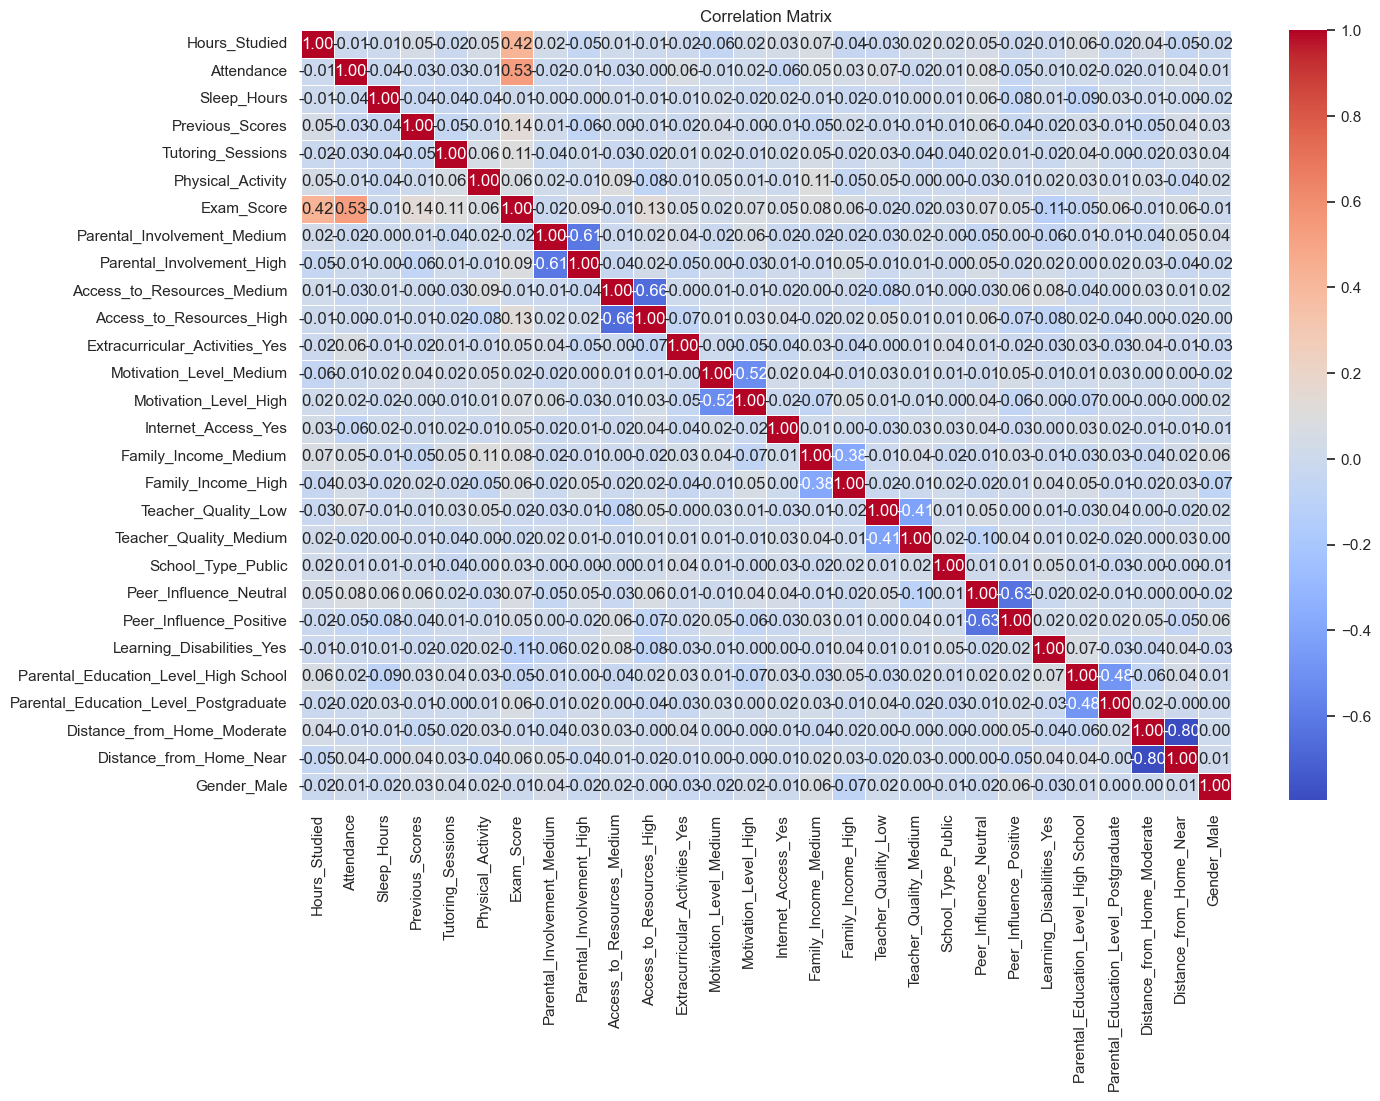

In [40]:
# Convert categorical variables to dummy/indicator variables
df_numeric = pd.get_dummies(df, drop_first=True)
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


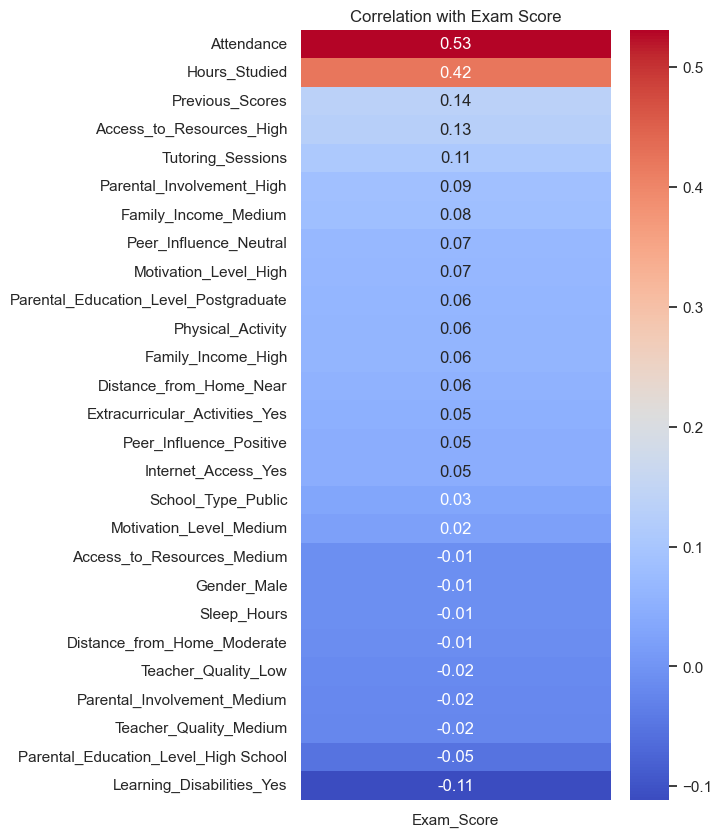

In [41]:
corr = correlation_matrix['Exam_Score'].drop('Exam_Score')
corr_sorted = corr.sort_values(ascending = False)
plt.figure(figsize=(5, 10))
sns.heatmap(corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title(f'Correlation with Exam Score')
plt.show()


1.	Top Positive Correlations:
- Attendance (0.53): Strongest correlation, suggesting consistent attendance significantly improves exam scores.
- Hours Studied (0.42): More study hours are strongly linked to higher scores.
- Previous Scores (0.14): A slight positive relationship between prior performance and current scores.
- Access to Resources High (0.13) and Tutoring Sessions (0.11) also show mild positive correlations.
2.	Negligible or Slight Correlations:
- Factors like Physical Activity (0.06), Peer Influence Positive (0.05), and School Type Public (0.03) show weak associations.
3.	Negative Correlation:
- Learning Disabilities Yes (-0.11): Students with learning disabilities tend to score lower.
- Parental Education Level High School (-0.05): Slight negative association.

Conclusion:
- Attendance and study hours are the most critical predictors of exam success.
- Learning disabilities are barriers to high exam performance.
- Many other factors show minimal or no correlation, indicating they may not directly impact scores.

# T-test



A T-test is a statistical test used to compare the means of two groups. It helps determine if the differences between the groups are statistically significant. There are different types of T-tests, including:

1. **Independent T-test**: Compares the means of two independent groups (e.g., test scores of two different classes).
2. **Paired T-test**: Compares the means of the same group at different times (e.g., test scores before and after a training program).
3. **One-sample T-test**: Compares the mean of a single group to a known value or population mean.

Key Assumptions:
- The data should be approximately normally distributed.
- The variances of the two groups should be equal (for independent T-test).
- The data should be continuous and measured on an interval or ratio scale.

Formula:
The T-test statistic is calculated as:
\begin{equation}
    t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} 
\end{equation}
where:
- $\bar{X}_1$ and $\bar{X}_2$ are the sample means.
- $s_1^2$ and $s_2^2$ are the sample variances.
- $n_1$ and $n_2$ are the sample sizes.

Interpretation:
- A high absolute value of the T-test statistic indicates a significant difference between the groups.
- The p-value associated with the T-test helps determine the significance level. A p-value less than 0.05 typically indicates a statistically significant difference.

T-tests are widely used in hypothesis testing to compare group means and draw inferences about the population.


We only conduct T-test for **Exam_Score** by **absolute high correlation variables** (> 0.08) only to examine their statistical significance. 

T-test for **Exam Score** by **Attendance**

In [42]:
low_attend_score = df[df['Attendance'] < df['Attendance'].mean()]['Exam_Score']
high_attend_score = df[df['Attendance'] >= df['Attendance'].mean()]['Exam_Score']
t_test_attend, p_value_attend = stats.ttest_ind(low_attend_score, high_attend_score)
t_test_attend, p_value_attend

(-15.254618248286626, 3.054116795983151e-47)

Interpretation:
1. t-statistic:
- The negative t-statistic of -15.25 indicates that the mean exam scores of the Low Attendance Group are significantly lower than those of the High Attendance Group.
- The large magnitude of the t-statistic reflects a substantial difference between the two groups.
2.	p-value:
- The p-value (3.05e-47) is extraordinarily small and far below any standard significance level (e.g., 0.05).
- This confirms the result is highly statistically significant.

Conclusion:

- There is a highly significant difference in exam scores between students with low and high attendance.
- Students with high attendance consistently achieve significantly higher exam scores compared to students with low attendance.

Insight:

The strong relationship between attendance and exam scores highlights the importance of consistent attendance for academic success. This suggests interventions to improve attendance could greatly benefit students’ academic performance.

T-test for **Exam Score** by **Hours Studied**

In [43]:
low_study_score = df[df['Hours_Studied'] < df['Hours_Studied'].mean()]['Exam_Score']
high_study_score = df[df['Hours_Studied'] >= df['Hours_Studied'].mean()]['Exam_Score']
t_test_study, p_value_study = stats.ttest_ind(low_study_score, high_study_score)
t_test_study, p_value_study

(-12.567061312983801, 1.1669997294228215e-33)

Interpretation:
1.	t-statistic:
- The negative t-statistic of -12.57 shows that the mean exam scores of students in the Low Study Group are significantly lower than those in the High Study Group.
- The magnitude of the t-statistic reflects a large difference in exam performance between the two groups.
2.	p-value:
- The p-value of 1.17e-33 is exceptionally small and far below any standard significance level (e.g., 0.05).
- This confirms the difference in scores is highly statistically significant.

Conclusion:

- There is a highly significant difference in exam scores between students who studied fewer hours and those who studied more.
- Students in the High Study Group achieved significantly higher exam scores compared to students in the Low Study Group.

Insight:

This result highlights a strong positive relationship between the number of hours studied and exam performance. Encouraging students to increase their study time can lead to substantial improvements in academic outcomes.

T-test for **Exam Score** by **Previous Scores**

In [44]:
no_improve_score = df[df['Previous_Scores'] >= df['Exam_Score']]['Exam_Score']
improve_score = df[df['Previous_Scores'] < df['Exam_Score']]['Exam_Score']

t_test_improve, p_value_improve = stats.ttest_ind(no_improve_score, improve_score)
t_test_improve, p_value_improve

(-2.540888175457113, 0.011212447144504364)

Interpretation:
1. t-statistic:
- The negative t-statistic of -2.54 indicates that the mean exam scores of the Improvement Group are significantly higher compared to the No Improvement Group.
- The negative sign reflects the direction of the comparison: “Improvement Group” scores are greater.
2.	p-value:
- The p-value of 0.0112 is less than 0.05, confirming that the result is statistically significant.
- This means the observed difference in scores is unlikely to occur by chance.

Conclusion:

There is a significant difference between the two groups:
- Students who improved their scores from their previous performance achieved significantly higher current exam scores compared to those who did not improve (or performed worse).
- This highlights the meaningful progress made by the Improvement Group and suggests positive learning outcomes for these students.

T-test for **Exam_Score** with **Access to Resources**

In [45]:
low_res_score = df[df["Access_to_Resources"] == "Low"]["Exam_Score"]
mid_res_score = df[df["Access_to_Resources"] == "Medium"]["Exam_Score"]
high_res_score = df[df["Access_to_Resources"] == "High"]["Exam_Score"]

In [46]:
t_stat_low_mid_res, p_value_low_mid_res = stats.ttest_ind(low_res_score, mid_res_score)
t_stat_low_mid_res, p_value_low_mid_res

(-3.18891543354725, 0.0014957252892988232)

In [47]:
t_stat_low_high_res, p_value_low_high_res = stats.ttest_ind(low_res_score, high_res_score)
t_stat_low_high_res, p_value_low_high_res

(-5.66219315112377, 2.5280786788454585e-08)

In [48]:
t_stat_mid_high_res, p_value_mid_high_res = stats.ttest_ind(mid_res_score, high_res_score)
t_stat_mid_high_res, p_value_mid_high_res

(-2.5907856929411226, 0.009755734487414106)

1. Low vs. Medium Access to Resources:
Interpretation:
- The t-statistic is -3.19, indicating a clear difference in means, with the Medium Access group performing better than the Low Access group.
- The p-value of 0.0015 is less than 0.05, meaning the result is statistically significant.

Conclusion:

There is a significant difference in exam scores between students with low and medium access to resources. Students with medium access achieve significantly higher scores than those with low access.

2. Low vs. High Access to Resources:
Interpretation:
- The t-statistic of -5.66 indicates a strong difference, with students in the High Access group scoring much higher than those in the Low Access group.
- The p-value is extremely small (2.52e-08), confirming the difference is highly statistically significant.

Conclusion:

There is a highly significant difference in exam scores between students with low and high access to resources. Students with high access consistently outperform those with low access.

3. Medium vs. High Access to Resources:
Interpretation:
- The t-statistic of -2.59 indicates that students with High Access to resources perform better than those with Medium Access.
- The p-value of 0.0098 is less than 0.05, indicating a statistically significant difference.

Conclusion:

There is a significant difference in exam scores between students with medium and high access to resources. Students with high access achieve better scores than those with medium access.

Overall Summary:
- Low vs. Medium: Significant difference (Medium > Low).
- Low vs. High: Highly significant difference (High > Low).
- Medium vs. High: Significant difference (High > Medium).

Final Insight:

Access to resources positively impacts exam performance:
- Higher access to resources consistently leads to higher exam scores.
- Improving access from Low to Medium or High levels significantly benefits academic outcomes.

T-test for **Exam Score** by **Tutoring Sessions**

In [49]:
tutoring_yes_score = df[df['Tutoring_Sessions'] > 0]['Exam_Score']
tutoring_no_score = df[df['Tutoring_Sessions'] == 0]['Exam_Score']
t_stat_tutoring, p_value_tutoring = stats.ttest_ind(tutoring_yes_score, tutoring_no_score)
t_stat_tutoring, p_value_tutoring 

(2.8454133015403795, 0.004529052049602933)

Interpretation:
1.	t-statistic:
- The t-statistic of 2.85 indicates a clear positive difference in mean exam scores.
- Students who attended tutoring sessions scored significantly higher than those who did not.
2.	p-value:
- The p-value of 0.0045 is much smaller than the significance level of 0.05.
- This indicates that the difference in scores is statistically significant, and the results are unlikely due to chance.

Conclusion:

There is a significant difference in exam scores between students who attended tutoring sessions and those who did not. Students who participated in tutoring sessions performed significantly better on exams compared to those who did not. This suggests that tutoring has a positive impact on academic performance.

However, recall from above scatterplot, as the number of sessions increases, there is no clear positive trend, and scores may even decline slightly.

Therefore, while tutoring sessions are beneficial overall (as per the t-test), the negative trend in the scatter plot suggests diminishing returns or a concentration of low-performing students in higher session counts. Further analysis, such as examining individual improvements or controlling for initial performance, could provide a clearer picture.

T-test for Exam Score by **Parental Involvement**

In [51]:
low_involve_score = df[df["Parental_Involvement"] == "Low"]["Exam_Score"]
mid_involve_score = df[df["Parental_Involvement"] == "Medium"]["Exam_Score"]
high_involve_score = df[df["Parental_Involvement"] == "High"]["Exam_Score"]

In [67]:
t_stat_low_mid_involve, p_value_low_mid_involve = stats.ttest_ind(low_involve_score, mid_involve_score)
t_stat_low_mid_involve, p_value_low_mid_involve 

(-1.2700609894937471, 0.20448917403642103)

In [68]:
t_stat_low_high_involve, p_value_low_high_involve = stats.ttest_ind(low_involve_score, high_involve_score)
t_stat_low_high_involve, p_value_low_high_involve

(-2.882688678378617, 0.0041147945658387)

In [69]:
t_stat_mid_high_involve, p_value_mid_high_involve = stats.ttest_ind(mid_involve_score, high_involve_score)
t_stat_mid_high_involve, p_value_mid_high_involve

(-2.2309507637929977, 0.02598129514766117)

1.	Low vs. Medium Parental Involvement:
Interpretation:
- The t-statistic of -1.27 indicates a small difference in scores between students with “Low” and “Medium” parental involvement.
- The p-value of 0.2045 is greater than 0.05, meaning the difference is not statistically significant.

Conclusion:
There is no significant difference in exam scores between students with low and medium parental involvement.

2.	Low vs. High Parental Involvement:
Interpretation:

- The t-statistic of -2.88 shows a significant difference in scores, with students from the “High” parental involvement group scoring higher than those from the “Low” group.
- The p-value of 0.0041 is less than 0.05, indicating the difference is statistically significant.

Conclusion:
There is a significant difference in exam scores between students with low and high parental involvement. Students with high parental involvement perform better.

3.	Medium vs. High Parental Involvement:
Interpretation:

- The t-statistic of -2.23 indicates a notable difference in mean scores, with the “High” parental involvement group performing better than the “Medium” group.
- The p-value of 0.0259 is less than 0.05, meaning the difference is statistically significant.

Conclusion:
There is a significant difference in exam scores between students with medium and high parental involvement. Students with high parental involvement perform better.

Overall Summary:
- Low vs. Medium: No significant difference.
- Low vs. High: Significant difference (High > Low).
- Medium vs. High: Significant difference (High > Medium).

Final Insight:

Students with high parental involvement perform significantly better compared to those with low or medium parental involvement. However, there is no significant improvement from low to medium involvement, suggesting that higher levels of involvement yield the most noticeable impact on exam performance.

T-test for **Exam Score** by **Family Income**

In [52]:
low_income_score = df[df["Family_Income"] == "Low"]["Exam_Score"]
mid_income_score = df[df["Family_Income"] == "Medium"]["Exam_Score"]
high_income_score = df[df["Family_Income"] == "High"]["Exam_Score"]

In [53]:
t_stat_low_mid_income, p_value_low_mid_income = stats.ttest_ind(low_income_score, mid_income_score)
t_stat_low_mid_income, p_value_low_mid_income

(-3.527125081316411, 0.00044443032959461457)

In [54]:
t_stat_low_high_income, p_value_low_high_income = stats.ttest_ind(low_income_score, high_income_score)
t_stat_low_high_income, p_value_low_high_income

(-3.0756520161902077, 0.002198155940548102)

In [55]:
t_stat_mid_high_income, p_value_mid_high_income = stats.ttest_ind(mid_income_score, high_income_score)
t_stat_mid_high_income, p_value_mid_high_income

(-0.2695196008704527, 0.7876294962077461)

1. Low vs. Medium Family Income:
Interpretation:
- The t-statistic of -3.53 indicates a significant difference in scores, with students from Medium Income families scoring higher than those from Low Income families.
- The p-value of 0.00044 is much smaller than 0.05, meaning the difference is statistically significant.

Conclusion:

There is a significant difference in exam scores between students from low and medium family income levels. Students with medium family income perform better on average.

2. Low vs. High Family Income: 
Interpretation:
- The t-statistic of -3.08 shows that students from High Income families score higher than those from Low Income families.
- The p-value of 0.0022 is less than 0.05, indicating a statistically significant difference.

Conclusion:

There is a significant difference in exam scores between students from low and high family income levels. Students with high family income perform better.

3. Medium vs. High Family Income:
Interpretation:
- The t-statistic of -0.27 indicates a very small difference in mean scores between students from medium and high family income levels.
- The p-value of 0.7876 is much greater than 0.05, meaning the difference is not statistically significant.

Conclusion:

There is no significant difference in exam scores between students from medium and high family income levels.

Overall Summary:
- Low vs. Medium: Significant difference (Medium > Low).
- Low vs. High: Significant difference (High > Low).
- Medium vs. High: No significant difference.

Final Insight:
- Students from medium and high income families perform significantly better than those from low income families.
- However, there is no significant difference between students from medium and high income families, suggesting diminishing returns of higher income on exam performance.

T-test for **Exam Score** by **Learning Disabilities**

In [50]:
disable_yes_score = df[df['Learning_Disabilities'] == "Yes"]['Exam_Score']
disable_no_score = df[df['Learning_Disabilities'] == "No"]['Exam_Score']
t_stat_disable, p_value_disable = stats.ttest_ind(disable_yes_score, disable_no_score)
t_stat_disable, p_value_disable

(-3.4796932747176106, 0.0005243901229253358)

Interpretation:
1. t-statistic:
- The negative t-statistic of -3.48 indicates that the mean exam scores of students with learning disabilities are lower than those without learning disabilities.
- The magnitude of the t-statistic reflects a substantial difference between the two groups.
2.	p-value:
- The p-value of 0.00052 is much smaller than 0.05, indicating the result is highly statistically significant.
- This means the observed difference in exam scores is unlikely to have occurred by chance.

Conclusion:

There is a significant difference in exam scores between students with and without learning disabilities. Specifically:
- Students with learning disabilities score significantly lower on exams compared to those without learning disabilities.

Insight:

This result highlights the need for additional support mechanisms (e.g., personalized learning programs, accommodations) to help students with learning disabilities achieve better academic outcomes.

# Limitation of T-test



1. **Assumption of Normality**:
- T-tests assume that the data follows a normal distribution. If this assumption is violated, the results of the T-test may not be valid.

2. **Data Type**:
- T-tests are designed for continuous data and compare means between groups.

3. **Sample Size**:
- T-tests can be sensitive to small sample sizes, which may affect the reliability of the results.

4. **Homogeneity of Variances**:
- T-tests assume that the variances of the two groups being compared are equal (homogeneity of variances).

5. **Number of Groups**:
- T-tests are limited to comparing two groups at a time.

In summary, T-tests are useful for comparing means of continuous data only. 

# Chi-Square Test


The Chi-Square test is a statistical test used to determine if there is a significant association between two categorical variables. It compares the observed frequencies in each category to the frequencies that would be expected if there were no association between the variables.

1. **Observed Frequencies (O)**: The actual count of cases in each category.
2. **Expected Frequencies (E)**: The count of cases that would be expected in each category if there were no association between the variables, calculated based on the marginal totals.

**Formula**

The Chi-Square statistic is calculated as:
\begin{equation}
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
\end{equation}
where:
- $O_i$ = Observed frequency for category $i$
- $E_i$ = Expected frequency for category $i$

Interpretation:
- **Degrees of Freedom (df)**: Calculated as $(\text{number of rows} - 1) \times (\text{number of columns} - 1)$.
- **P-value**: The probability that the observed association is due to chance. A p-value less than 0.05 typically indicates a statistically significant association.

Applications:
- **Goodness of Fit**: Tests if a sample matches the distribution of a population.
- **Test of Independence**: Tests if two categorical variables are independent.


Chi-Square tests help resolve issues of T-tests:
- Chi-Square tests do not require the assumption of normality and can be used with categorical data.
- Chi-Square tests are suitable for categorical data and compare frequencies or proportions between groups.
- Chi-Square tests can handle larger sample sizes and are often used in contingency tables with multiple categories.
- Chi-Square tests do not have this assumption and can be used when variances are unequal.
- Chi-Square tests can compare multiple groups simultaneously, making them more versatile for categorical data analysis.

Compared to T-tests, Chi-Square tests are more appropriate for analyzing categorical data and comparing frequencies or proportions across multiple groups.

We only conduct Chi-Square test for **Exam_Score** by **absolute high correlation variables** (> 0.08) only to examine their statistical significance. 

**Preprocessing**: Binning "Exam_Score" for Chi-Square test

What is Binning?

Binning is a data preprocessing technique where continuous numerical data is divided into a number of smaller intervals, or "bins." This is often done to transform continuous data into categorical data, which can be useful for certain types of statistical analysis, such as the Chi-Square test.

Why Binning for Chi-Square Test?

The Chi-Square test is used to determine if there is a significant association between two categorical variables. Since "Exam_Score" is likely a continuous variable, you need to convert it into a categorical variable by binning it into discrete intervals. This allows you to use the Chi-Square test to examine relationships between "Exam_Score" and other categorical variables.

In [56]:
# Binning 'Exam_Score' for chi-square test
df['Exam_Score_Binned'] = pd.cut(df['Exam_Score'], bins=5, labels=False)

In [57]:
variables_to_test = ['Attendance', 'Hours_Studied', 'Previous_Scores', 'Access_to_Resources', 'Tutoring_Sessions', 'Learning_Disabilities', 'Family_Income']

# Function to perform Chi-Square test
def chi_square_test(variable):
    contingency_table = pd.crosstab(df[variable], df['Exam_Score_Binned'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    return chi2, p

Chi-Square test for **Exam Score** by **Attendance**

In [58]:
chi2_attend, p_value_attend = chi_square_test("Attendance")
chi2_attend, p_value_attend

(488.03751096643623, 7.03801696488285e-35)

Interpretation:
1.	Chi-Square Statistic:
- The Chi-Square value of 488.04 is very large, indicating a substantial association between Attendance and Exam Scores.
2.	p-value:
- The p-value of 7.04e-35 is extraordinarily small and far below the standard significance level (e.g., 0.05).
- This indicates that the association between Attendance and Exam Scores is highly statistically significant.

Conclusion:

- There is a highly significant association between Attendance and Exam Scores.
- This confirms that attendance plays a crucial role in exam performance, with variations in attendance levels being strongly related to differences in scores.

Insight:

Improving attendance rates can have a significant positive impact on academic performance, as attendance is strongly associated with higher exam scores.

Chi-Square test for **Exam Score** by **Hours Studied**

In [59]:
chi2_study, p_value_study = chi_square_test("Hours_Studied")
chi2_study, p_value_study

(348.93714449204583, 1.1758745763467096e-20)

Interpretation:
1.	Chi-Square Statistic:
- The Chi-Square value of 348.94 is very large, indicating a strong association between the number of Hours Studied and Exam Scores.
2.	p-value:
- The p-value of 1.18e-20 is exceptionally small, far below the standard threshold (e.g., 0.05).
- This confirms the association is highly statistically significant.

Conclusion:

- There is a highly significant association between the number of Hours Studied and Exam Scores.
- This means that study time has a meaningful impact on exam performance, and variations in study hours are strongly related to differences in exam scores.

Insight:

The findings reinforce that increasing study time can substantially improve exam performance. Effective time management and study strategies should be encouraged to help students achieve better results.

Chi-Square test for **Exam Score** by **Previous Scores**

In [60]:
chi2_prev, p_value_prev = chi_square_test("Previous_Scores")
chi2_prev, p_value_prev

(226.16536077970224, 0.09883787990204328)

Interpretation:
1.	Chi-Square Statistic:
- The Chi-Square value of 226.17 indicates a moderate association between Previous Scores and Exam Scores.
2.	p-value:
- The p-value of 0.0988 is greater than 0.05 (the common threshold for statistical significance).
- This indicates that the observed relationship between Previous Scores and Exam Scores is not statistically significant.

Conclusion:

- There is no significant association between Previous Scores and Exam Scores based on the Chi-Square test results.
- While the Chi-Square value suggests some association, the p-value indicates that the result is likely due to chance.

Insight:

Previous performance does not appear to have a strong or statistically significant impact on current exam scores. This suggests that other factors (e.g., study habits, attendance, or access to resources) may play a more critical role in determining performance.

Chi-Square test for **Exam Score** by **Access to Resources**

In [61]:
chi2_res, p_value_res = chi_square_test("Access_to_Resources")
chi2_res, p_value_res

(28.957592154914074, 0.0003225777678120482)

Interpretation:
1.	Chi-Square Statistic:
- The Chi-Square value of 28.96 indicates a noticeable association between Access to Resources and Exam Scores.
2.	p-value:
- The p-value of 0.00032 is far smaller than the standard threshold of 0.05.
- This means the relationship between Access to Resources and Exam Scores is statistically significant.

Conclusion:

- There is a significant association between Access to Resources and Exam Scores.
- Students with better access to resources are likely to achieve higher exam scores, highlighting the importance of equitable access to learning materials.

Insight:

This result emphasizes that improving students’ access to educational resources (e.g., books, technology, or learning support) can lead to better academic outcomes. Addressing resource disparities could help bridge performance gaps.

Chi-Square test for **Exam Score** by **Tutoring Sessions**

In [62]:
chi2_tutor, p_value_tutor = chi_square_test("Tutoring_Sessions")
chi2_tutor, p_value_tutor

(74.71344374124662, 2.8631070149406826e-05)

Interpretation:
1.	Chi-Square Statistic:
- The Chi-Square value of 74.71 is quite large, suggesting a notable association between Tutoring Sessions and Exam Scores.
2.	p-value:
- The p-value of 2.86e-05 is extremely small, far below the standard threshold of 0.05.
- This confirms that the relationship is highly statistically significant.

Conclusion:

- There is a significant association between the number of Tutoring Sessions attended and Exam Scores.
- Students who attended tutoring sessions tend to have different (likely higher) exam scores compared to those who did not attend.

Insight:

This result reinforces the positive impact of tutoring sessions on academic performance. Encouraging participation in tutoring programs can lead to measurable improvements in student outcomes.

Chi-Square test for **Exam Score** by **Family Income**

In [64]:
chi2_income, p_value_income = chi_square_test("Family_Income")
chi2_income, p_value_income

(19.570969297629347, 0.012086995368397574)

Interpretation:
1.	Chi-Square Statistic:
- The Chi-Square value of 19.57 suggests a moderate association between Family Income and Exam Scores.
2.	p-value:
- The p-value of 0.0121 is less than 0.05, which indicates that the relationship is statistically significant.
- This means the differences in Exam Scores based on Family Income are unlikely to occur by chance.

Conclusion:

- There is a significant association between Family Income and Exam Scores.
- Students from families with higher income tend to achieve better exam scores, highlighting the impact of economic factors on academic performance.

Insight:

This result emphasizes the role of socioeconomic status in education. Higher family income may provide better access to resources, learning environments, and opportunities, leading to improved academic outcomes. Reducing economic disparities can help bridge performance gaps among students.

Chi-Square test for **Exam Score** by **Parental Involvement**

In [72]:
chi2_involve, p_value_involve = chi_square_test("Parental_Involvement")
chi2_involve, p_value_involve

(20.553722819294215, 0.008432318968787806)

Interpretation:
1.	Chi-Square Statistic:

- The Chi-Square value of 20.55 indicates a moderate association between Parental Involvement and Exam Scores.

2.	p-value:

- The p-value of 0.0084 is less than 0.05, meaning the relationship is statistically significant.
- This suggests that the differences in Exam Scores based on levels of Parental Involvement are unlikely to occur by chance.

Conclusion:

There is a significant association between Parental Involvement and Exam Scores. Students with higher parental involvement tend to achieve better exam scores, underscoring the importance of parental support in academic success.

Insight:

This result highlights the critical role of parental involvement in education. Higher involvement levels may provide students with greater motivation, guidance, and support, leading to improved academic performance. Encouraging stronger parental engagement can be an effective strategy to enhance student outcomes.

Chi-Square test for **Exam Score** by **Learning Disabilities**

In [63]:
chi2_disable, p_value_disable = chi_square_test("Learning_Disabilities")
chi2_disable, p_value_disable

(8.028163896554581, 0.09055194592868482)

The Chi-Square test examines the relationship between Learning Disabilities and Exam Scores.

Results:
- Chi-Square Statistic: 8.028163896554581
- p-value: 0.09055194592868482

Interpretation:
1.	Chi-Square Statistic:
- The Chi-Square value of 8.03 indicates a weak association between Learning Disabilities and Exam Scores.
2.	p-value:
- The p-value of 0.0906 is greater than 0.05, which means the result is not statistically significant.
- This indicates that the observed relationship could have occurred by chance.

Conclusion:

- There is no significant association between Learning Disabilities and Exam Scores based on this Chi-Square test.

Insight:

While the presence of learning disabilities might suggest some differences in performance, the result indicates that these differences are not statistically significant. Other factors (e.g., support systems, teaching methods) could play a more critical role in determining outcomes for students with learning disabilities.